In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, precision_score, precision_recall_curve, confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [9]:
df = pd.read_csv('../data/processed/healthcare-dataset-processed.csv')

<Axes: >

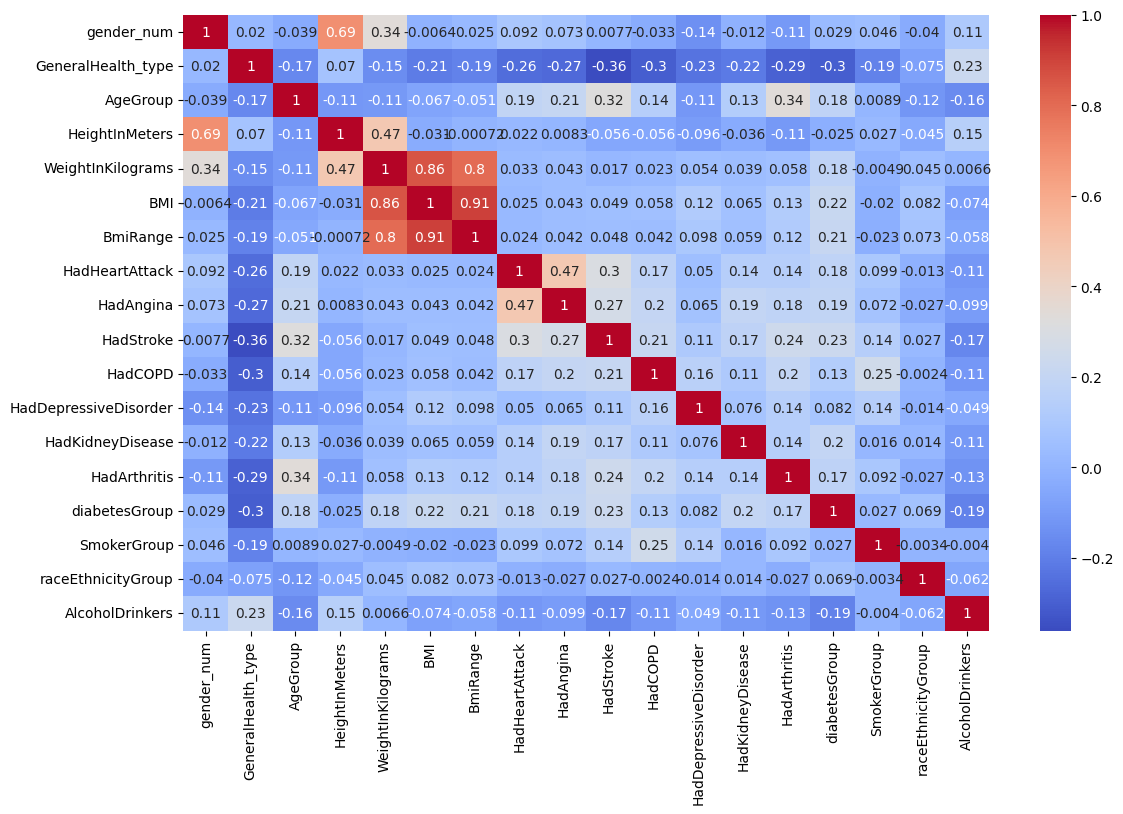

In [12]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

### Train Test Split

In [44]:
X_train

,AgeGroup,HadHeartAttack,diabetesGroup,SmokerGroup,AlcoholDrinkers
2405,3,0,0,0,0
18472,3,0,0,0,1
15353,2,0,0,1,1
24639,4,0,3,0,0
24251,2,0,0,2,0
...,...,...,...,...,...
21575,4,0,0,0,0
5390,3,0,2,3,0
860,3,1,0,3,0
15795,2,0,0,2,0


In [17]:
X = df[['AgeGroup', 'HadHeartAttack', 'diabetesGroup','SmokerGroup', 'AlcoholDrinkers']]
Y = df['HadStroke']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
# importar tu csv trst
# importar tu modelo pickle
# evaluar con todo el csv test

### Entrenar y predecir

# Modelo 1: DecisionTreeClassifier

### Entrenar y predecir

In [37]:
dct_model = DecisionTreeClassifier(max_depth=6)
dct_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [38]:
y_pred = dct_model.predict(X_test)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('confusion matrix'), confusion_matrix(y_test,y_pred)

accuracy_score 0.7021646695013529
precision_score 0.5970944309927361
recall_score 0.6349124613800206
confusion matrix


(None,
 array([[2400,  832],
        [ 709, 1233]]))

# Modelo 2: LogisticRegression

### Entrenar y predecir

In [40]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
{"fecha": [(),()]}

In [41]:
y_pred = lr_model.predict(X_test)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
print('confusion matrix'), confusion_matrix(y_test,y_pred)

accuracy_score 0.7118283726323927
precision_score 0.6448298008991651
recall_score 0.5169927909371782
confusion matrix


(None,
 array([[2679,  553],
        [ 938, 1004]]))

In [43]:
params = {"C" : np.arange(0.1,10,0.1)}

gs = GridSearchCV(estimator=lr_model, param_grid=params, cv=5, scoring='recall', verbose=3)
gs.fit(X_train, y_train)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .............................C=0.1;, score=0.524 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.515 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.523 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.501 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.525 total time=   0.0s
[CV 1/5] END .............................C=0.2;, score=0.524 total time=   0.0s
[CV 2/5] END .............................C=0.2;, score=0.515 total time=   0.0s
[CV 3/5] END .............................C=0.2;, score=0.523 total time=   0.0s
[CV 4/5] END .............................C=0.2;, score=0.503 total time=   0.0s
[CV 5/5] END .............................C=0.2;, score=0.525 total time=   0.0s
[CV 1/5] END .............C=0.30000000000000004;, score=0.524 total time=   0.0s
[CV 2/5] END .............C=0.30000000000000004